In [59]:
abs_path = "/home/melsakka/Projects/agri_potential/"
geojson_path = abs_path+"/data/dataset.geojson"
sentinel_path = abs_path+"/data/S2B_MSIL2A_20191025T104029_N0500_R008_T31TEJ_20230713T200604.SAFE/GRANULE/L2A_T31TEJ_A013762_20191025T104457/IMG_DATA/R10m/"

blue_band_path = sentinel_path+"T31TEJ_20191025T104029_B02_10m.jp2"
green_band_path = sentinel_path+"T31TEJ_20191025T104029_B03_10m.jp2"
red_band_path = sentinel_path+"T31TEJ_20191025T104029_B04_10m.jp2"
nir_band_path = sentinel_path+"T31TEJ_20191025T104029_B08_10m.jp2"


In [2]:
import rasterio
import numpy as np

meta = rasterio.open(blue_band_path).meta

blue_band = rasterio.open(blue_band_path).read(1).astype('float32')
green_band = rasterio.open(green_band_path).read(1).astype('float32')
red_band = rasterio.open(red_band_path).read(1).astype('float32')
nir_band = rasterio.open(nir_band_path).read(1).astype('float32')


In [3]:
blue_band.shape, green_band.shape, red_band.shape, nir_band.shape

((10980, 10980), (10980, 10980), (10980, 10980), (10980, 10980))

In [4]:
meta

{'driver': 'JP2OpenJPEG',
 'dtype': 'uint16',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 1,
 'crs': CRS.from_epsg(32631),
 'transform': Affine(10.0, 0.0, 499980.0,
        0.0, -10.0, 4900020.0)}

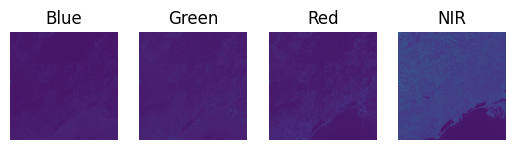

In [5]:
import matplotlib.pyplot as plt

def plot(nrows, ncols, idx, arr, title):
    plt.subplot(nrows, ncols, idx)
    plt.imshow(arr)
    plt.axis('off')
    plt.title(title)
    
%matplotlib inline
plot(1, 4, 1, blue_band, "Blue")
plot(1, 4, 2, green_band, "Green")
plot(1, 4, 3, red_band, "Red")
plot(1, 4, 4, nir_band, "NIR")

plt.show()

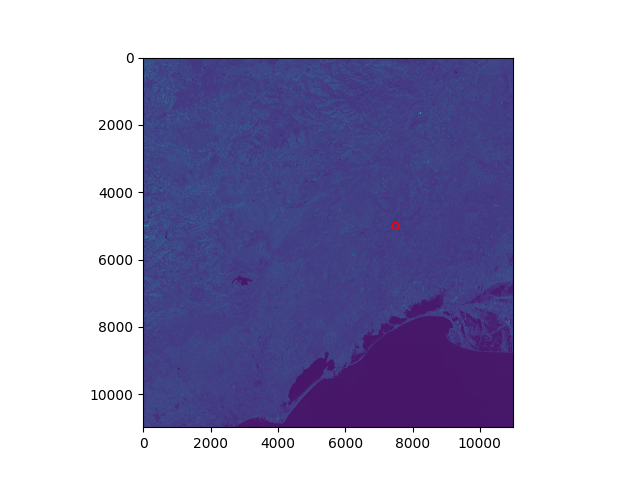

In [6]:
%matplotlib ipympl

x, y = 7500, 5000

plt.imshow(nir_band)
plt.scatter(x, y, s=1, color='red', edgecolor='red', facecolors='none', linewidth=5)
plt.show()

In [7]:
transform = meta["transform"]
crs = meta["crs"]
transform, crs


(Affine(10.0, 0.0, 499980.0,
        0.0, -10.0, 4900020.0),
 CRS.from_epsg(32631))

In [8]:
xs, ys = transform*(x,y)
xs, ys

(574980.0, 4850020.0)

In [16]:
from pyproj import Transformer
transformer = Transformer.from_crs(crs, "EPSG:4326")
transformer.transform(xs, ys)


(43.79944345730278, 3.9320788361795476)

In [10]:
geojson_path

'/home/melsakka/Projects/agri_potential//data/dataset.geojson'

In [6]:
import geojson

def stats():
    data_path = geojson_path
    
    with open(data_path) as f:
        data = geojson.load(f)
        
    return data 

    # for feature in data['features']:
    #     source = feature['properties']['ind_conf']
    #     source_counts[source] = source_counts.get(source, 0) + 1

    # for source, count in source_counts.items():
    #     print(f"{source}: {count} occurrence(s)")


In [7]:
data = stats()

In [9]:
data.keys()

dict_keys(['type', 'features'])

In [13]:
data["type"]

'FeatureCollection'

In [14]:
type(data["features"])

list

In [53]:
l = []

for feature in data["features"]:
    # print(type(feature))
    # print(feature.keys())
    
    geometry = feature["geometry"]
    properties = feature["properties"]

    try:
        if not geometry["type"] in l:
            l += [geometry["type"]]
            if geometry["type"] == "Polygon":
                # print("poly", geometry)
                # print(geometry["coordinates"]) # list of polygons, given that the thing is Polygon AKA 1 only then we only have a list of a list of coords
                # print(geometry["coordinates"][0]) # THE polygon (aka list of coords)
                # print(geometry["coordinates"][0][0]) # list of coords (lat, long) (gps)
                pass
            else:
                # print("multi", geometry)
                # print("multi", len(geometry["coordinates"])) # list of multipolygons
                # print("multi", len(geometry["coordinates"][0])) # list of polygons in the multipolygon
                # print("multi", len(geometry["coordinates"][0][0])) # list of points in the polygon
                # print("multi", len(geometry["coordinates"][0][0][0])) # list of coords
                pass
    except:
        # print(feature, geometry)
        pass
    print(properties["geo_point_2d"])
    break


{'lon': 3.852066248233229, 'lat': 43.80824633465832}


In [60]:
import geopandas as gpd
import rasterio 

In [61]:
nir = rasterio.open(nir_band_path)

In [64]:
nir.shape, nir.transform, nir.crs

((10980, 10980),
 Affine(10.0, 0.0, 499980.0,
        0.0, -10.0, 4900020.0),
 CRS.from_epsg(32631))

In [65]:
gdf = gpd.read_file(geojson_path)
gdf = gdf.to_crs(nir.crs)


In [79]:
gdf # like pandas

,id_sol,commune,potent_vit,potent_gc,potent_ma,pot_global,source,ind_conf,iddiz,icucs,st_area_shape,st_perimeter_shape,geo_shape,geo_point_2d,geometry
0,20275,VALFLAUNES,Moyen,Assez_limite,Assez_limite,Assez_limite,BDSOL initiale,3.5,0.0,0,7078.340832,466.897698,None,"{ ""lon"": 3.8520662482332289, ""lat"": 43.8082463...","POLYGON ((568605.985 4850862.601, 568571.079 4..."
1,20276,VALFLAUNES,Moyen,Assez_limite,Assez_limite,Assez_limite,BDSOL initiale,3.5,0.0,0,8077.722941,418.139648,None,"{ ""lon"": 3.8513263470006192, ""lat"": 43.8069790...","POLYGON ((568542.565 4850790.731, 568539.533 4..."
2,20227,VALFLAUNES,Limite,Limite,Limite,Limite,BDSOL initiale,3.5,0.0,0,132724.646100,3920.127008,None,"{ ""lon"": 3.8856623321463517, ""lat"": 43.8005125...","POLYGON ((571140.584 4850138.509, 571157.033 4..."
3,20233,VALFLAUNES,Assez_fort,Assez_fort,Assez_fort,Assez_fort,BDSOL initiale,3.5,0.0,0,81912.271383,2278.151932,None,"{ ""lon"": 3.8918101277118065, ""lat"": 43.7994367...","POLYGON ((571374.185 4849861.885, 571477.893 4..."
4,20235,VALFLAUNES,Limite,Limite,Limite,Limite,BDSOL initiale,3.5,0.0,0,12764.735107,556.449670,None,"{ ""lon"": 3.8855352269895933, ""lat"": 43.7958348...","POLYGON ((571228.34 4849660.001, 571310.916 48..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24461,23615,SAINT_GELY_DU_FESC,Limite,Limite,Limite,Limite,BDSOL initiale,3.0,0.0,0,144564.369656,1751.742536,None,"{ ""lon"": 3.8001378732581874, ""lat"": 43.6999144...","POLYGON ((564364.047 4838630.932, 564338.454 4..."
24462,23619,SAINT_GELY_DU_FESC,Assez_fort,Assez_fort,Assez_fort,Assez_fort,BDSOL initiale,3.0,0.0,0,14808.815792,559.654500,None,"{ ""lon"": 3.8068076378548676, ""lat"": 43.7020730...","POLYGON ((564899.149 4839083.2, 564941.011 483..."
24463,23628,SAINT_JEAN_DE_MINERVOIS,Assez_fort,Assez_fort,Assez_fort,Assez_fort,BDSOL initiale,3.0,0.0,0,6475.858271,397.719378,None,"{ ""lon"": 2.8727859271278184, ""lat"": 43.3861554...","POLYGON ((489770.165 4803780.763, 489770.708 4..."
24464,23631,SAINT_MATHIEU_DE_TREVIERS,Moyen,Assez_limite,Assez_limite,Assez_limite,BDSOL initiale,3.5,0.0,0,4328.626107,480.594169,None,"{ ""lon"": 3.8535187769582246, ""lat"": 43.7508371...","POLYGON ((568737.097 4844541.457, 568749.18 48..."


In [94]:
import numpy as np
import matplotlib.pyplot as plt

labels = ["Limite", "Assez_limite", "Moyen", "Assez_fort", "Fort_a_tres_fort"]
categorical_mask = np.zeros((nir.shape[0], nir.shape[1], 6))

categorical_mask.shape

(10980, 10980, 6)

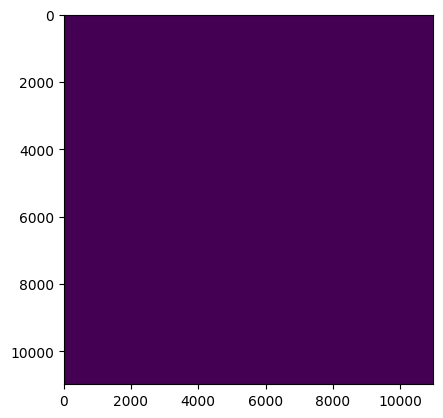

In [73]:

plt.imshow(categorical_mask[:,:,0])

In [95]:
from rasterio.mask import geometry_mask
labels = ["Limite", "Assez_limite", "Moyen", "Assez_fort", "Fort_a_tres_fort"]

for i, label in enumerate(labels):
    mask = geometry_mask(gdf[gdf["pot_global"]==label].geometry, 
                             out_shape=nir.shape, 
                             transform=nir.transform, 
                             invert=False)
    categorical_mask[:,:,i][mask] = 1

In [96]:
categorical_mask.shape

(10980, 10980, 6)

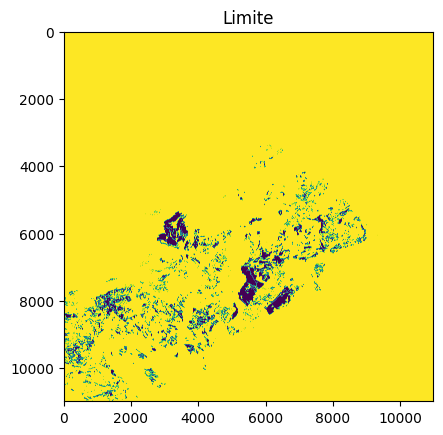

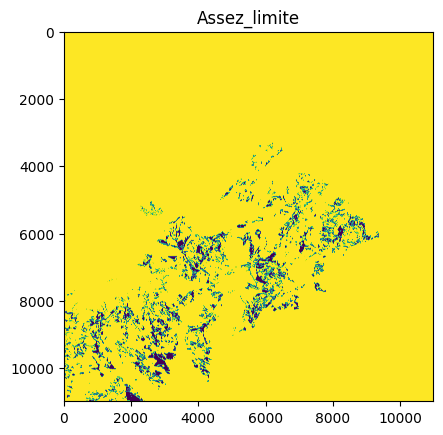

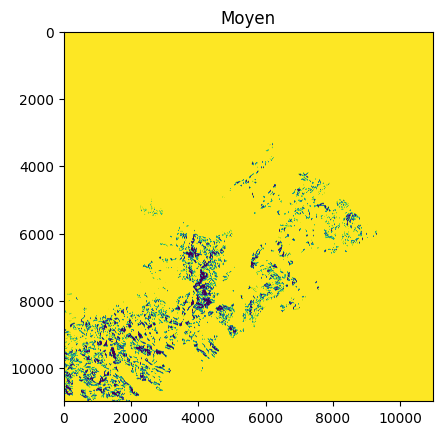

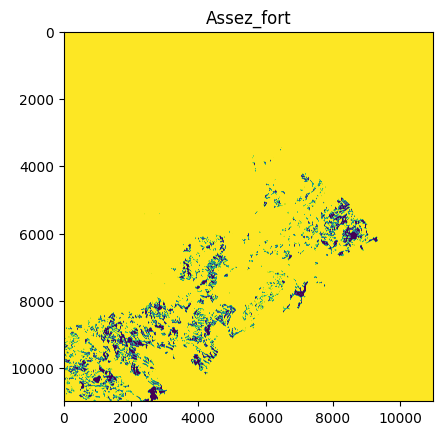

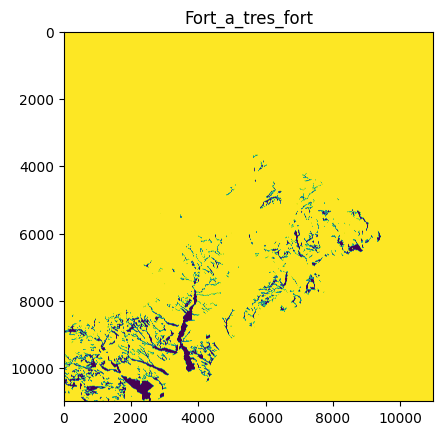

In [97]:
for i in range(5):
    plt.imshow(categorical_mask[:,:,i])
    plt.title(labels[i])
    plt.show()